                               Development approach

1 Collect images of people with mask and without mask<br>
2 Use Dlib CNN face detector to detect face from images. Use Dlib 128D vector(face) generated from each sample image as train/test data<br>
3 Use K Nearst Neighbors(KNN) model as face recognition model<br>
4 First will train KNN with only masked face images. I split images data as two groups of train and test. In the train group, it has nine people folders. Each person has 7-16 picture. The test group put all images in one folder. Those images are not used for training<br>
5 Adjust parameters/models<br>
Face detector: HOG, CNN<br>
KNN model: Number of neighbors. weights: {‘uniform’, ‘distance’}. algorithm: {‘ball_tree’, ‘kd_tree’, ‘brute’}. <br>
Trained model: distance threshold: {0.6, 0.5, 0.4}. Bascally 0.6 can be considered as same person<br>


In [16]:
# jsp_kneighbors_face.ipynb
# Use face_recognition to identify masked face
import numpy as np
import os
import face_recognition as frg
from sklearn.neighbors import KNeighborsClassifier
import re
import math
import matplotlib.pyplot as plt
import pickle 

In [5]:
# We define a train function

def kntrain(X, y, neighbors, kn_alg, weight):
    if neighbors is None:
        neighbors = int(math.sqrt(len(X)))
    klf1 = KNeighborsClassifier(algorithm=kn_alg, n_neighbors=neighbors, weights=weight)
    klf1.fit(X,y)
    return klf1, neighbors            

In [8]:
# Train KNN model
# Create training matrix X, y
from timeit import default_timer as timer
from datetime import timedelta
start = timer()

extension = ['jpg','png','bmp','jpeg']
X =[]
y =[]

tfiles = 0  #Total number of train files        #训练文件数目
dfiles = 0  #Number of files detected face

for (root,dirs,files) in os.walk('maskedface4'):
    pattern = '^\w+/train/\w+'
    if re.match(pattern, root):
        print('root:',root)
        print('files:',files)
        label0 = root.split('/')[-1]
        for imgf in files:
            imgf = imgf.lower()
            if imgf.split('.')[1] in extension:
                imgpath = os.path.join(root, imgf)
                tfiles += 1
                npimg = frg.load_image_file(imgpath, mode='RGB')
                # Use model='hog' for non-masked face. Use model='cnn' for masked face
                #f_location = frg.face_locations(npimg, model='hog')
                
                f_location = frg.face_locations(npimg, model='cnn')    #修改cnn或hog
                
                #print('imgpath:',imgpath)
                #print('label0:',label0)                
                if len(f_location) == 1:
                    print('fpath:',imgpath)
                    print('f_location:',f_location)   
                    f_encord = frg.face_encodings(npimg,known_face_locations=f_location)[0]
                    X.append(f_encord)
                    y.append(label0)
                    dfiles += 1
                else:
                    print('Incorrect face image!')    
            else:
                print('File $s has wrong format' % imgf)

end = timer()
print('Processing images elapsed time:',timedelta(seconds=end-start))

#Adjust neighbors, kn_alg(Algorithm), weight
klf, neighbor = kntrain(X, y, neighbors=None, weight='distance', kn_alg='ball_tree') #修改number或tree或weight

#Save y list to a file in current folder
y_path = 'y_list.txt'
with open(y_path, 'w') as filehandle:
    filehandle.writelines("%s\n" % line for line in y)

#Save trained model
# Open a pickle channel to save trained model in current folder
model_path = 'face_model_file'
model_saving = open(model_path, 'wb')
pickle.dump(klf, model_saving)

print('Saved model file:',model_path)
print('Number of neighbors:', neighbor)
print('Face detection rate of train samples:', (dfiles/tfiles))
print('Number of train sample files:', tfiles)
end = timer()
print('Train procedure elapsed time:',timedelta(seconds=end-start))


root: maskedface4/train/00192
files: ['017.jpg', '018.jpg', '019.jpg', '012.jpg', '008.jpg', '007.jpg', '004.jpg', '011.jpg']
fpath: maskedface4/train/00192/017.jpg
f_location: [(65, 140, 105, 101)]
fpath: maskedface4/train/00192/018.jpg
f_location: [(57, 178, 105, 131)]
fpath: maskedface4/train/00192/019.jpg
f_location: [(77, 176, 117, 137)]
fpath: maskedface4/train/00192/012.jpg
f_location: [(73, 195, 191, 77)]
fpath: maskedface4/train/00192/008.jpg
f_location: [(43, 154, 90, 107)]
fpath: maskedface4/train/00192/007.jpg
f_location: [(33, 149, 81, 102)]
Incorrect face image!
fpath: maskedface4/train/00192/011.jpg
f_location: [(96, 149, 143, 102)]
root: maskedface4/train/00001
files: ['009.jpg', '008.jpg', '007.jpg', '004.jpg', '006.jpg', '005.jpg', '000.jpg', '001.jpg', '003.jpg', '002.jpg']
fpath: maskedface4/train/00001/009.jpg
f_location: [(184, 351, 429, 106)]
fpath: maskedface4/train/00001/008.jpg
f_location: [(184, 351, 429, 106)]
Incorrect face image!
fpath: maskedface4/train/0

Incorrect face image!
fpath: maskedface4/train/00521/013.jpg
f_location: [(37, 152, 77, 113)]
fpath: maskedface4/train/00521/014.jpg
f_location: [(39, 168, 121, 86)]
Incorrect face image!
fpath: maskedface4/train/00521/026.jpg
f_location: [(71, 174, 128, 117)]
Incorrect face image!
Incorrect face image!
Incorrect face image!
Incorrect face image!
Incorrect face image!
Processing images elapsed time: 0:00:11.028532
Saved model file: face_model_file
Number of neighbors: 9
Face detection rate of train samples: 0.7678571428571429
Number of train sample files: 112
Train procedure elapsed time: 0:00:11.030438


In [7]:
print(y)

['00192', '00192', '00192', '00192', '00192', '00192', '00192', '00001', '00001', '00001', '00001', '00001', '00001', '00001', '00001', '00001', '00505', '00505', '00505', '00505', '00505', '00505', '00505', '00004', '00004', '00004', '00004', '00004', '00004', '00004', '00004', '00004', '00004', '00004', '00004', '00004', '00002', '00002', '00002', '00002', '00002', '00002', '00002', '00002', '00002', '00002', '00002', '00002', '00394', '00394', '00394', '00394', '00394', '00394', '00394', '00394', '00394', '00394', '00003', '00003', '00003', '00003', '00003', '00003', '00003', '00003', '00515', '00515', '00515', '00515', '00515', '00515', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', '00521', '00521', '00521', '00521', '00521', '00521']


In [17]:
# Create test image list
Xt=[]   #Test images encoding
ft=[]   #Test image file path
lt=[]   #Face location in image
ttfiles = 0  #Number of test files
extension = ['jpg','png','bmp','jpeg']

for (root,dirs,files) in os.walk('maskedface4/test'):
    if (files!=""):
        for f1 in files:
            label1 = f1.split('.')[0]
            if f1.split('.')[1] in extension:
                f1path = os.path.join(root,f1)
                f1img = frg.load_image_file(f1path, mode='RGB')
                ttfiles += 1
            
                # Use model='hog' for non-masked face. Use model='cnn' for masked face
                #f_location = frg.face_locations(npimg, model='hog')
                f_locations = frg.face_locations(f1img, model='cnn')
            
                f_encodings = frg.face_encodings(f1img, known_face_locations=f_locations)
                print('len(f_locations):',len(f_locations))
                for i in range(len(f_encodings)):
                    Xt.append(f_encodings[i])
                    lt.append(f_locations[i])
                    ft.append(f1path)
print(len(Xt))
print(len(lt))
print(ft)
print('Number of test sample files:', ttfiles)
print('Face detection rate of test sample:', (len(Xt)/ttfiles))

len(f_locations): 1
len(f_locations): 1
len(f_locations): 1
len(f_locations): 0
len(f_locations): 1
len(f_locations): 1
len(f_locations): 1
len(f_locations): 1
len(f_locations): 1
len(f_locations): 1
len(f_locations): 1
len(f_locations): 1
len(f_locations): 1
len(f_locations): 1
13
13
['maskedface4/test/00505.jpg', 'maskedface4/test/indoor_050.png', 'maskedface4/test/00001.jpg', 'maskedface4/test/00394.jpg', 'maskedface4/test/00002.jpg', 'maskedface4/test/outdoor_089_副本.png', 'maskedface4/test/indoor_069.png', 'maskedface4/test/00003.jpg', 'maskedface4/test/00515.jpg', 'maskedface4/test/003.jpg', 'maskedface4/test/00004_2.jpg', 'maskedface4/test/00004.jpg', 'maskedface4/test/00192.jpg']
Number of test sample files: 14
Face detection rate of test sample: 0.9285714285714286


In [18]:
# This funcation can show the real image size inline, and draw label text
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display

def show_labels_on_image2(img_path, location, label_index):
    pil_image = Image.open(img_path).convert("RGB")
    (top,right, bottom, left) = location
    name = y[label_index]     # get predicted name
    #name = name.encode("UTF-8")
    draw = ImageDraw.Draw(pil_image)
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 255, 255))
    # Define font type and size. The font file is in my ubuntu 18.04. Font size is 14
    font_file = '/usr/share/fonts/truetype/freefont/FreeSansBold.ttf'
    font = ImageFont.truetype(font_file, 16)
    text_w,text_h = font.getsize(name)
    #text_width, text_height = draw.textsize(name)
    
    draw.text((left + 5, bottom + text_h), name, font=font, fill=(255, 255, 255, 255))

    #Below will pop up a image window
    #pil_image.show()
    #Below shows image inline
    display(pil_image)

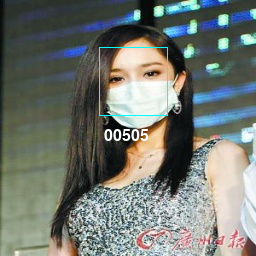

Test image: maskedface4/test/00505.jpg


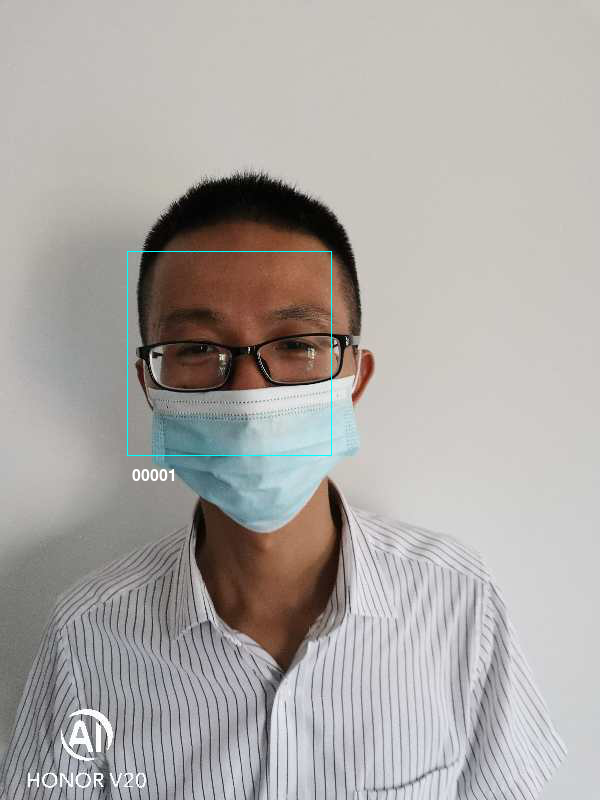

Test image: maskedface4/test/00001.jpg


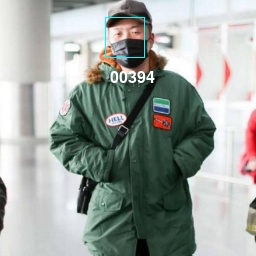

Test image: maskedface4/test/00394.jpg


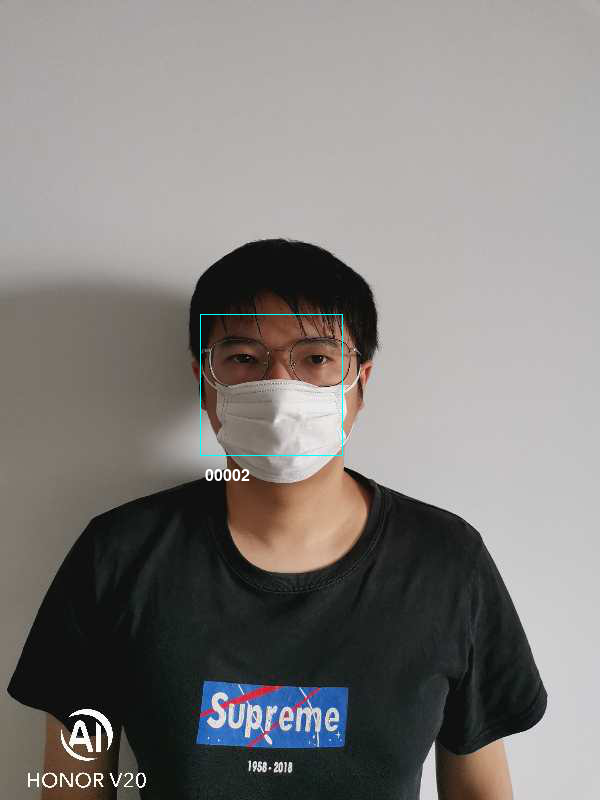

Test image: maskedface4/test/00002.jpg


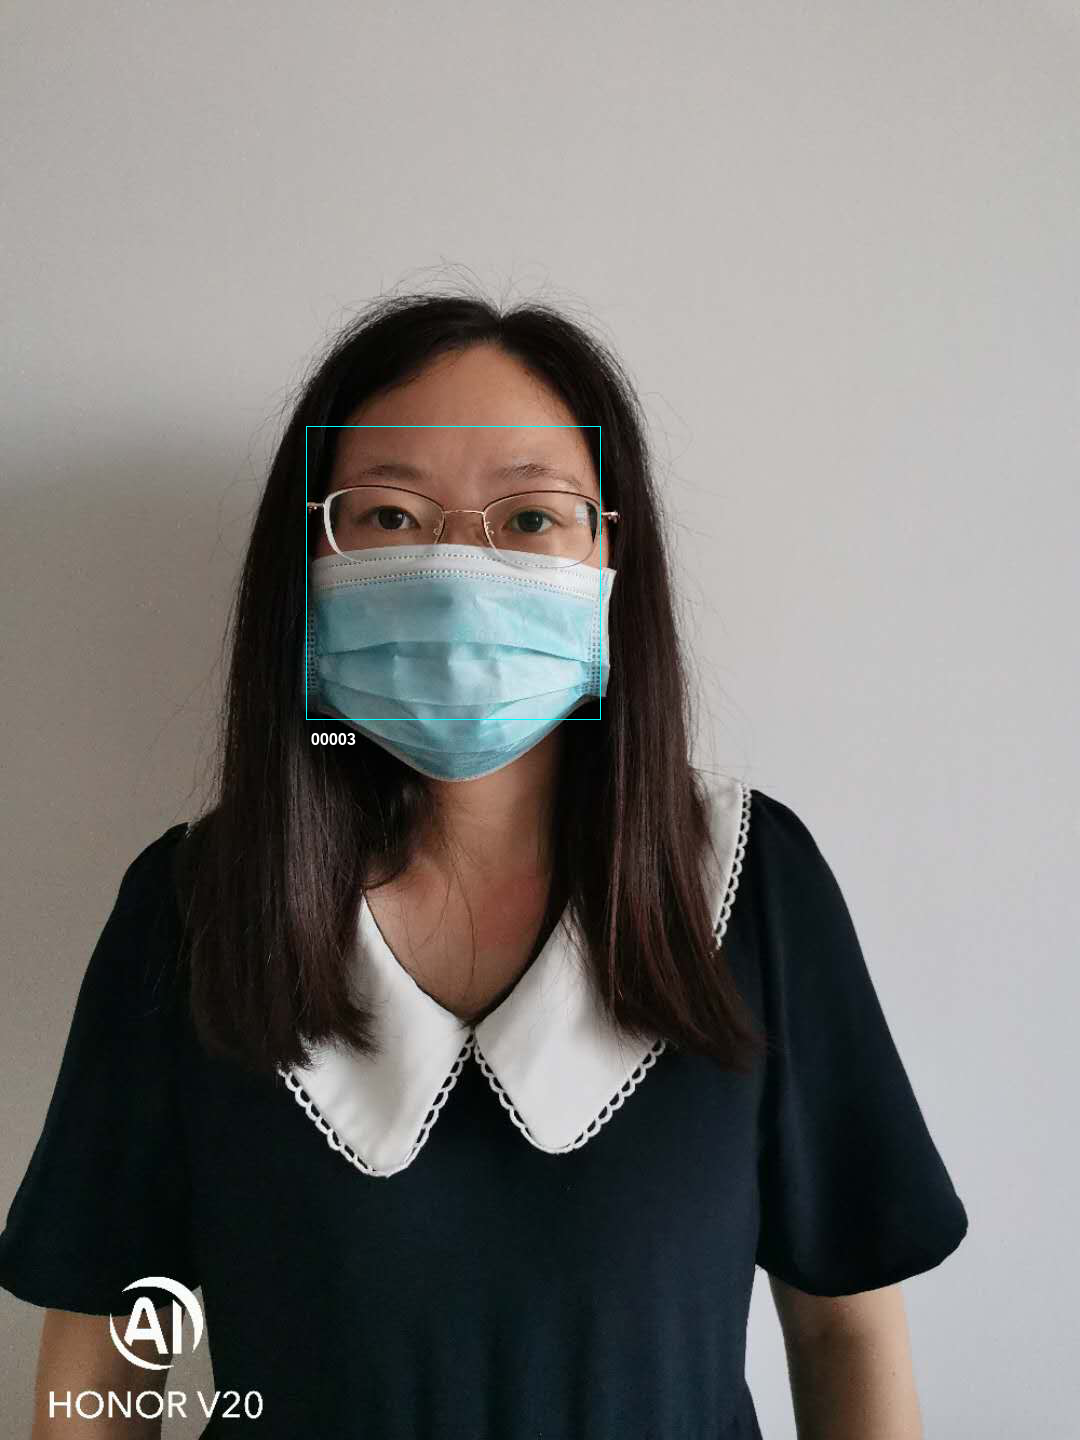

Test image: maskedface4/test/00003.jpg


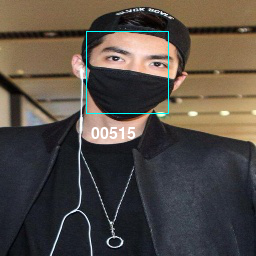

Test image: maskedface4/test/00515.jpg


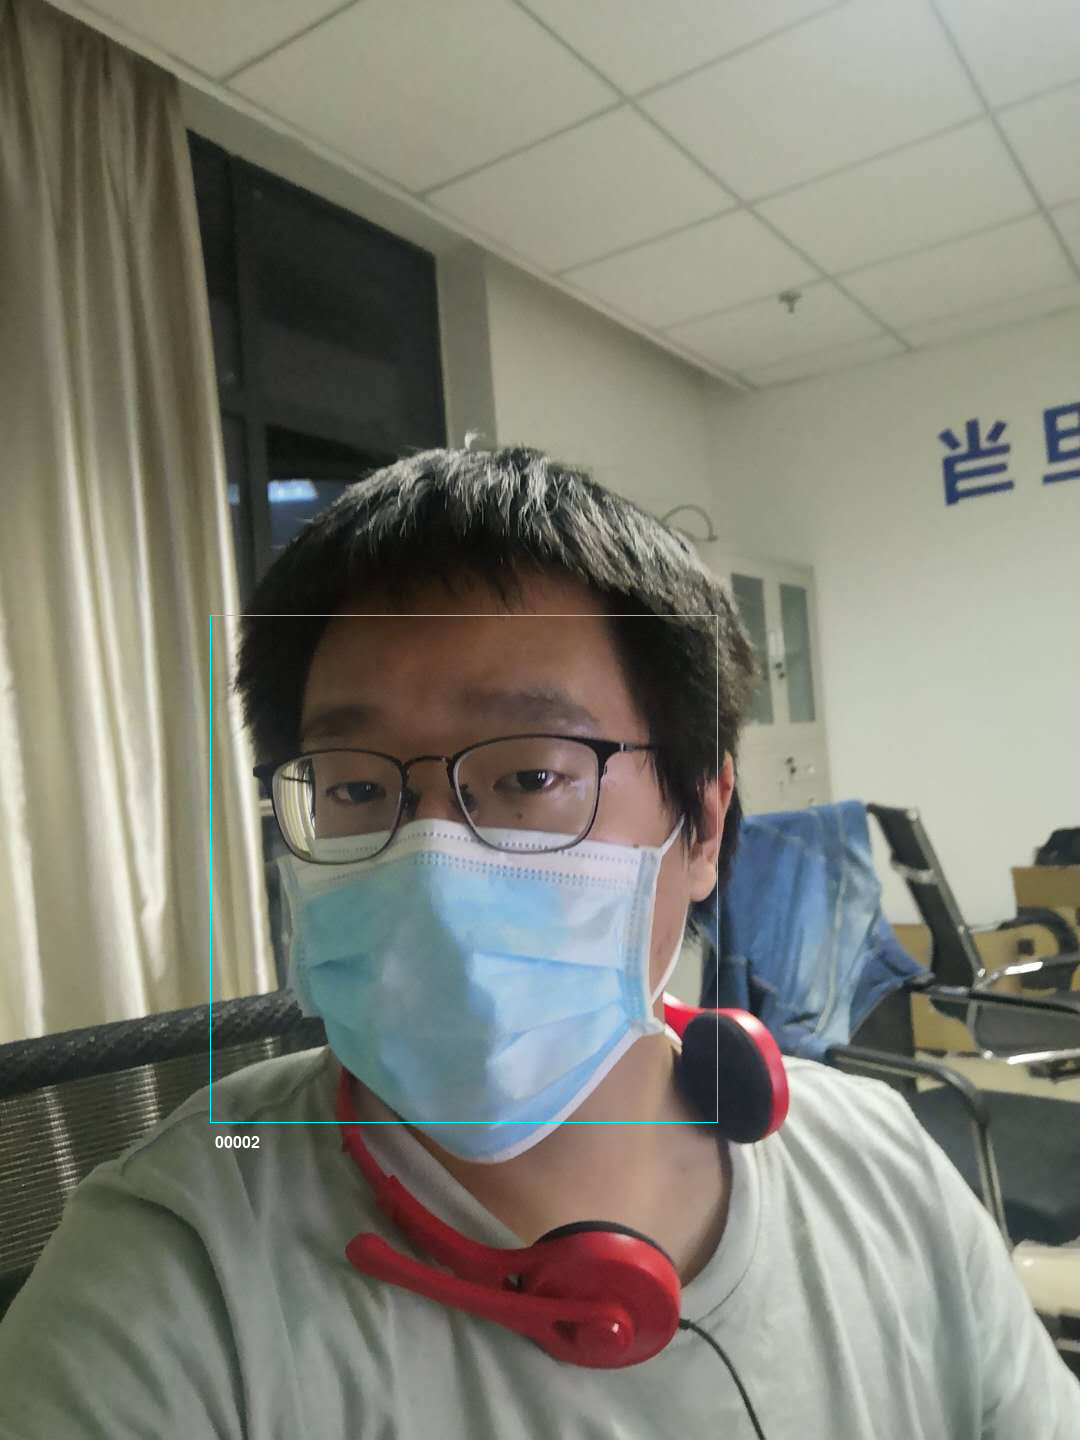

Test image: maskedface4/test/003.jpg


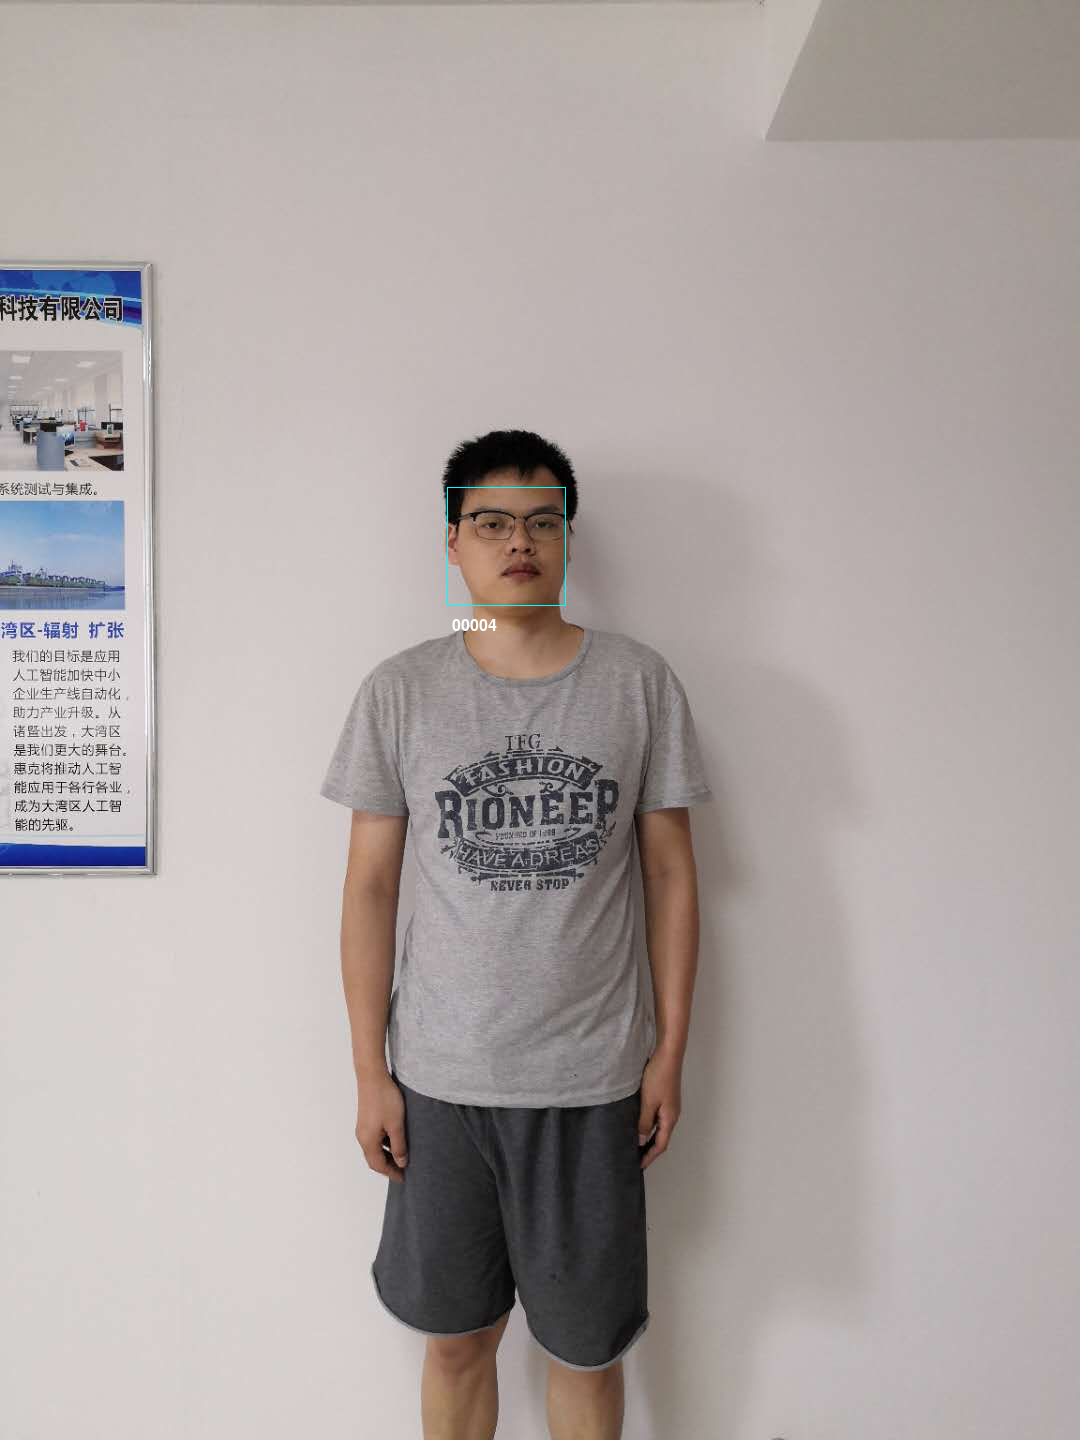

Test image: maskedface4/test/00004_2.jpg


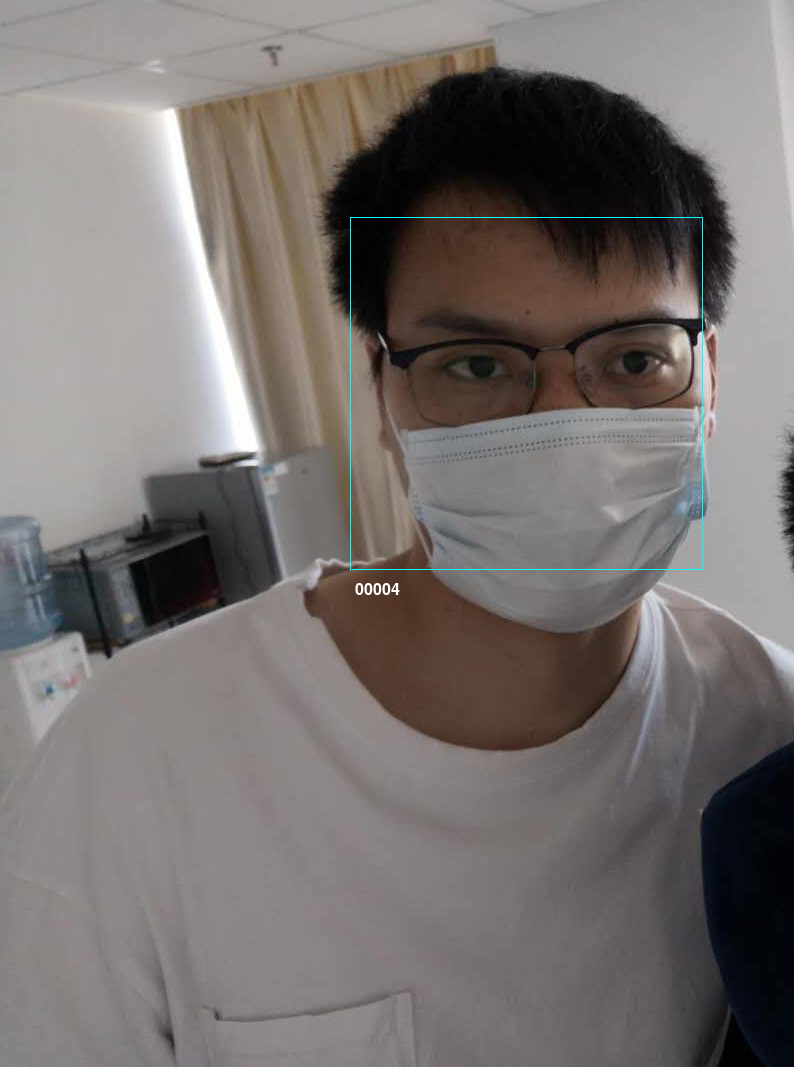

Test image: maskedface4/test/00004.jpg


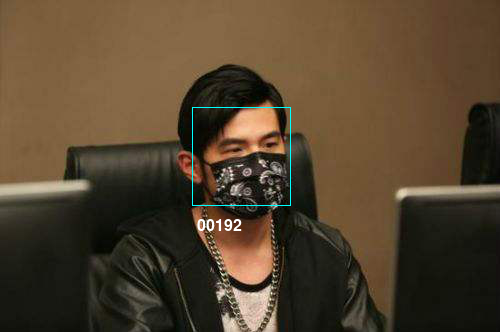

Test image: maskedface4/test/00192.jpg
Face recognition rate: 0.6923076923076923


In [19]:
# Test all images on trained knn model
# load the model from disk
import pickle 

#load trained model
model_path = 'face_model_file'
trained_model =  pickle.load(open(model_path, 'rb'))

#load saved y list
y=[]
y_path = 'y_list.txt'
with open(y_path, 'r') as filehandle:
    y = [line.rstrip() for line in filehandle.readlines()]


dist_threshold = 0.5
face_recog_rate = 0
for i in range(len(Xt)):
    xt = Xt[i].reshape(1,-1)
    closest_distance = trained_model.kneighbors(xt, n_neighbors=1, return_distance=True)
    if closest_distance[0][0][0] <= dist_threshold:
        # Below closest_distance[1][0][0] is label (y) indices
        show_labels_on_image2(ft[i], lt[i], closest_distance[1][0][0])
        print('Test image:', ft[i])
        name = y[closest_distance[1][0][0]]     # get predicted name
        if ft[i].find(name) != -1:
            face_recog_rate += 1
print('Face recognition rate:', face_recog_rate/len(Xt))

In [14]:
print('Number of neighbors:', neighbor)
print('Distance threshold',dist_threshold)
print('Number of train sample files:', tfiles)
print('Number of test sample files:', ttfiles)
print('Processing images elapsed time:',timedelta(seconds=end-start))
print('Face detection rate of train samples:', (dfiles/tfiles))
print('Face detection rate of test sample:', (len(Xt)/ttfiles))
print('Face recognition rate:', face_recog_rate/len(Xt))

Number of neighbors: 14
Distance threshold 0.6
Number of train sample files: 205
Number of test sample files: 20
Processing images elapsed time: 0:00:33.617076
Face detection rate of train samples: 1.0
Face detection rate of test sample: 1.0
Face recognition rate: 0.65


In [20]:
coefficients = [1,2,3,4]
for index, coff in enumerate(coefficients[::-1]):
    print(index,coff)

0 4
1 3
2 2
3 1


In [23]:
def our_decorator(func):
    def function_wrapper(x):
        print('This is function_wrapper')
        func(x)
    return function_wrapper

def foo(x):
    print("Hi, foo has been called with " + str(x))

print("We call foo before decoration:")
foo("Hi")
    
print("We now decorate foo with func:")
foo = our_decorator(foo)

print("We call foo after decoration:")
foo(42)

We call foo before decoration:
Hi, foo has been called with Hi
We now decorate foo with func:
We call foo after decoration:
This is function_wrapper
Hi, foo has been called with 42
